# Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

# Read data

In [60]:
#Training data
X_train = pd.read_csv("Dataset/Train/X_train.txt", sep = " ", header = None)
y_train = pd.read_csv("Dataset/Train/y_train.txt", sep = " ", header = None)

#Testing data
X_test = pd.read_csv("Dataset/Test/X_test.txt", sep = " ", header = None)
y_test = pd.read_csv("Dataset/Test/y_test.txt", sep = " ", header = None)

#activity labels
y_labels = pd.read_csv("Dataset/activity_labels.txt", header = None)
classes = y_labels[0]

#feature labels
features = pd.read_csv("Dataset/features.txt", header = None)


In [ ]:
# test different kernels, compare results to find the best method for more accuracy
# plot results

In [5]:
# cross-validated grid-search over a parameter grid
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005],}
grid = GridSearchCV(model, param_grid, verbose=3, refit=True)


In [6]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train.values.ravel())

/Users/Danielle/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.9262832883056735, total=   3.3s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.9204633204633205, total=   3.6s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.5s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.9520494972931168, total=   3.9s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.9262832883056735, total=   3.4s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.9204633204633205, total=   3.4s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.9520494972931168, total=   3.6s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.9262832883056735, total=   3.2s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.9204633204633205, total=   3.4s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.9520494972931168, total=   3.6s
[CV] C=1, gamma=0.005 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  5.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [7]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


In [8]:
# List the best score
print(grid.best_score_)

0.9329213338483326


In [35]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
# Fit to the training data and validate with the test data
svc_linear = SVC(kernel='linear')
svc_linear.fit(pd.DataFrame(X_train), y_train.values.ravel())
predictions = svc_linear.predict(X_test)
# Model Accuracy
print('Training Accuracy: %.3f' % svc_linear.score(X_train, y_train))
print('Test Accuracy: %.3f' % svc_linear.score(X_test, y_test))

Training Accuracy: 0.993
Test Accuracy: 0.952


In [36]:
# Fit to the training data and validate with the test data
svc_rbf = SVC(kernel='rbf', gamma='scale')
svc_rbf.fit(pd.DataFrame(X_train), y_train.values.ravel())
predictions = model.predict(X_test)
# Model Accuracy
print('Training Accuracy: %.3f' % svc_rbf.score(X_train, y_train))
print('Test Accuracy: %.3f' % svc_rbf.score(X_test, y_test))

Training Accuracy: 0.963
Test Accuracy: 0.928


In [37]:
# Fit to the training data and validate with the test data
svc_sigmoid = SVC(kernel='sigmoid', gamma='scale')
svc_sigmoid.fit(pd.DataFrame(X_train), y_train.values.ravel())
predictions = svc_sigmoid.predict(X_test)
# Model Accuracy
print('Training Accuracy: %.3f' % svc_sigmoid.score(X_train, y_train))
print('Test Accuracy: %.3f' % svc_sigmoid.score(X_test, y_test))

Training Accuracy: 0.901
Test Accuracy: 0.881


AttributeError: 'SVC' object has no attribute 'proof'

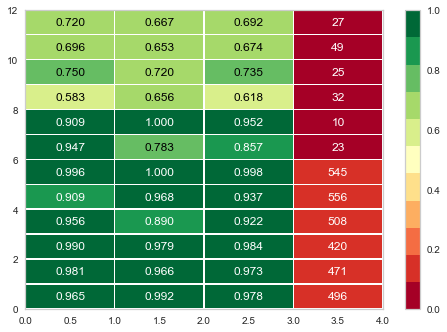

In [61]:
# Calculate classification report
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(svc_linear, support=True, classes = classes, cmap="RdYlGn")
visualizer.fit(X_train, y_train.values.ravel())
visualizer.score(X_test, y_test)
visualizer.proof()


In [39]:
# Calculate classification report
from sklearn.metrics import classification_report
predictions = svc_linear.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.96      0.99      0.98       496
           2       0.98      0.97      0.97       471
           3       0.99      0.98      0.98       420
           4       0.96      0.89      0.92       508
           5       0.91      0.97      0.94       556
           6       1.00      1.00      1.00       545
           7       0.95      0.78      0.86        23
           8       0.91      1.00      0.95        10
           9       0.58      0.66      0.62        32
          10       0.75      0.72      0.73        25
          11       0.70      0.65      0.67        49
          12       0.72      0.67      0.69        27

   micro avg       0.95      0.95      0.95      3162
   macro avg       0.87      0.86      0.86      3162
weighted avg       0.95      0.95      0.95      3162



In [ ]:
# Calculate classification report
from yellowbrick.classifier import ClassificationReport
classes = y_labels[0]
visualizer = ClassificationReport(svc_rbf, support=True, classes=classes, cmap="RdYlGn")
visualizer.fit(X_train, y_train.values.ravel())
visualizer.score(X_test, y_test)
visualizer.proof()

/Users/Danielle/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


AttributeError: 'SVC' object has no attribute 'proof'

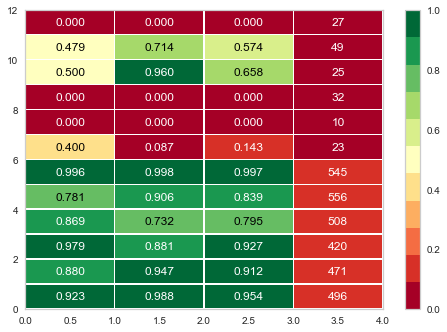

In [53]:
# Calculate classification report
from yellowbrick.classifier import ClassificationReport
classes = y_labels[0]
visualizer = ClassificationReport(svc_sigmoid, support=True, classes=classes, cmap="RdYlGn")
visualizer.fit(X_train, y_train.values.ravel())
visualizer.score(X_test, y_test)
visualizer.proof()